In [1]:
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
path.ls()

(#3) [Path('C:/Users/antho/.fastai/data/mnist_sample/labels.csv'),Path('C:/Users/antho/.fastai/data/mnist_sample/train'),Path('C:/Users/antho/.fastai/data/mnist_sample/valid')]

In [4]:
(path/'train').ls()

(#2) [Path('C:/Users/antho/.fastai/data/mnist_sample/train/3'),Path('C:/Users/antho/.fastai/data/mnist_sample/train/7')]

In [5]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [6]:
threes

(#6131) [Path('C:/Users/antho/.fastai/data/mnist_sample/train/3/10.png'),Path('C:/Users/antho/.fastai/data/mnist_sample/train/3/10000.png'),Path('C:/Users/antho/.fastai/data/mnist_sample/train/3/10011.png'),Path('C:/Users/antho/.fastai/data/mnist_sample/train/3/10031.png'),Path('C:/Users/antho/.fastai/data/mnist_sample/train/3/10034.png'),Path('C:/Users/antho/.fastai/data/mnist_sample/train/3/10042.png'),Path('C:/Users/antho/.fastai/data/mnist_sample/train/3/10052.png'),Path('C:/Users/antho/.fastai/data/mnist_sample/train/3/1007.png'),Path('C:/Users/antho/.fastai/data/mnist_sample/train/3/10074.png'),Path('C:/Users/antho/.fastai/data/mnist_sample/train/3/10091.png')...]

In [7]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [8]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [9]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [10]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[5:25,5:20])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0
1,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0
2,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0
3,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0
4,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0
5,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0
6,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0
7,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0
8,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2
9,0,0,0,0,0,0,43,98,98,208,253,253,253,253,187


In [11]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

with seven_tensors and three_tensors we are going through each image in the file and putting them into a list. So these two variables are lists of tensors for each image that we have iterated through.

In [12]:
three_tensors[1].shape

torch.Size([28, 28])

In [13]:
seven_tensors[1].shape

torch.Size([28, 28])

Remember that what we made into a tensor was each image. The three_tensors is just a list of tensors. As you can see, each image is a tensor that specifies the height and width.

<Axes: >

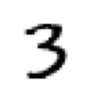

In [14]:
show_image(three_tensors[1])

In [15]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

length is the rank of a tensor. (IS NOT CLEARLY DEFINED)
rank is the number of axes / dimensions in a tensor.
shape is the size of each axis.


stacked_threes means that we are calling pytorch to stack all the 'three' images into a new tensor. At the same time, we divide it by 255 to 'normalize' all the images. So that they are all either between 1 and 0. This is important because it makes things easier to calculate because we don't necessarily need 255 different values.

When we stacked the images. It basically took each tensor of our three_tensors and seven_tensors list and combined them into one tensor which is stacked_threes and stacked_sevens. Remember that each element of the three_tensors list is a rank-2 tensor (matrix) that specified the height and width. Using this, the stack method basically 'integrated' this into a rank-3 tensor.

it would basically be this tensor[image_index, row_index, column_index]. Wherein if i wanted to access the pixel data of the 1st image's 15th row, and 25th column then i would just state stacked_threes[0, 14, 24]. (zero-based indexing btw) If you tried to output anything that is more than 28 then you'd get an error because the image is only 28x28!

In [16]:
stacked_threes[1,15,25]

tensor(0.)

In [17]:
len(stacked_threes.shape)

3

In [18]:
stacked_threes.ndim

3

Both two previous cells provide the same output
which is the rank of the tensor.

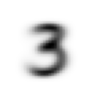

In [19]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)
show_image(mean3);

We perform mean operation in order to get the mean value of each pixel of all images. This creates a representation of what the image '3' is supposed to be from all the images that we have. We specify the 0 in .mean() because we want the first dimension of the stacked_threes tensor which is the list of all the images that we have.

--> The reason that the image is blurry because these are pixels where the images in the list disagree as to whether or not it should be fully dark or not. In other words, the many different images that we have are not exactly similiar in forming a 3 but have many different variants. However, for areas that a majority share similarities, it is fully dark.

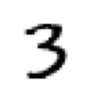

In [20]:
sample3 = stacked_threes[1]
sample7 = stacked_sevens[1]
show_image(sample3);

We are taking a sample from the stacked_threes tensor by selecting the index 1 in the first dimension of the tensor. The reason for this? We want to try comparing this to the average '3' that we made before. See how similiar they are from each other.

In [21]:
distance3_abs = (sample3 - mean3).abs().mean()
distance3_sqr = ((sample3 - mean3)**2).mean().sqrt()
distance3_abs, distance3_sqr

(tensor(0.1114), tensor(0.2021))

There are two methods to measure distance: 

The first is to take the mean of the absolute value of differences. Take note that absolute value just removes negatives as absolute values is just simply the distance of a number from zero. 

This is called **mean absolute difference** or **L1 Norm**

Basically you subtract the sample that we took earlier to our average three that we calculated earlier. Afterwards, convert the results to absolute values and the finally, calculate the mean.

The second is to square the differences. It's pretty simple. Negative x Negative = Positive. Then do a square root operation so that your squaring will be undone and you get back the original number but in the positive. 

This is called **root mean squared error** or **L2 Norm**

NOTE! - These two different methods have different outputs.

In [22]:
distance7_abs = (sample3 - mean7).abs().mean()
distance7_sqr = ((sample3 - mean7)**2).mean().sqrt()
distance7_abs, distance7_sqr

(tensor(0.1586), tensor(0.3021))

Here we check to see  the distance between the sample 3 that we have taken before and the average of 7. Just to compare with the distance of our average 3 to an actual 3. As a result, we can see that from both methods, the distance between the sample 3 and average 7 is higher because of course, they are entirely different numbers as compared to the results of our average 3 and an actual 3 earlier.

In [23]:
F.l1_loss(sample3.float(),mean7.float()), 

(tensor(0.1586),)

In [24]:
F.mse_loss(sample3,mean7).sqrt()

tensor(0.3021)

PyTorch already has their own functions to get the mean absolute difference or **l1_loss** and root mean squared error or **mse_loss**. We don't have to manually do all these operations before. However, we still add in some certain things. For **l1_loss**, the reason that we specify .float() is because we want to have similiar data types. For example, if sample3 is an integer tensor and the mean3 is a float tensor then this data mismatch can result to errors.  

In [25]:
data = [[1,2,3],[4,5,6]]
arr = array(data)
tns = tensor(data)

Brief explanation between NumPy & PyTorch: 

Numpy: Widely used library for scientific and numeric programming. However, does not utilize GPU or gradient calculation. These two are items are vital for deep learning. 

PyTorch: Is an important library for deep learning as it supports the use of a GPU and gradient calculation. However, when it comes to plotting and visualization of tensors, it can be problematic, especially with Matplotlib.

So typically, we use both NumPy and PyTorch. We convert NumPy arrays to PyTorch tensors for the majority of calculations and vice versa if we want to visualize or plot these tensors into a graph. 

PyTorch tensors and NumPy arrays are relatively the same. However, PyTorch tensors must always have the same size. If in the case that a tensor doesn't match the size, then you can substitute a value in its place in order for both sizes to be the same. 

In [26]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [27]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [28]:
tns[:,0]

tensor([1, 4])

In [29]:
valid3_tens = torch.stack([tensor(Image.open(o)) 
for o in (path/'valid'/'3').ls()])
valid3_tens = valid3_tens.float()/255

valid7_tens = torch.stack([tensor(Image.open(o))
for o in (path/'valid'/'7').ls()])
valid7_tens = valid7_tens.float()/255

valid3_tens.shape, valid7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

We want to measure the metric (distance) over a validation set. This is to avoid over-fitting in which our model only works on the data that we have trained it on. The model must also work on data that it has never seen before and that is why a validation set is important. Usually, this is done through removing some off of the training data and using those as the validation set.

In [30]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(sample3, mean3)

tensor(0.1114)

The mnist_distance function is basically a function measuring the distance using the **mean absolute difference** method. The reason that we input a tuple of (-1,-2) in the .mean() is because we are specifying the last two dimensions that we want to take the mean from. Keep in mind that the size of the tensor is 3 with the first element being the number of images. Then the last two are the height and width. This is what we are specifying by saying (-1,-2).

In [31]:
valid3_dist = mnist_distance(valid3_tens, mean3)
valid3_dist, valid3_dist.shape

(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

In the cell above we create a tensor with a list of the calculated distances in the validation set. This is all stored in the valid3_dist tensor. But, there is something curious about this. valid3_tens and mean3, the input that we provided to the mnist_distance function, aren't tensors of the same size. Take a look.

In [32]:
valid3_tens.shape, mean3.shape

(torch.Size([1010, 28, 28]), torch.Size([28, 28]))

When encountering two tensors of different rank with a simplesubtraction operation, PyTorch will use broadcasting. Which means that it will automatically expand the smaller tensor to have a similiar size with the larger rank. Afterwards, it conducts the 
usual logic. This is what we mentioned earlier that PyTorch requires tensors with similiar sizes to conduct operations.

Here is an example below with an addition of a tensor at size 2 with a tensor of size 1. See how all the elements of the first tensor were applied with the addition operation. 

In [33]:
tensor([1,2,3],[4,5,6]) + tensor(1)

tensor([[2, 3, 4],
        [5, 6, 7]])

In [34]:
(valid3_tens - mean3).shape

torch.Size([1010, 28, 28])

In the operation above, we try to figure out the resulting size of the subtraction operation of valid3_tens and mean3. As you might already know by now, the resulting shape is still pretty much the same as the size of valid3_tens. Remember that mean3 is just a single image of the average of what an 'ideal 3' looks like from the training data. Now, back to the reason why the shape pretty much remains the same, this is because mean3 is 'projected' as 1010 copies with each one being used to subtract with a corresponding image. However, it's important to note that mean3 isn't copied 1010 times, just pretends to be 1010 copies. 

In [35]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

The function above calculates whether or not the input is closer to 3 than 7 by simply determining if the distance of x to mean3 is lower than the distance of x to mean7. 

In [36]:
is_3(sample3), is_3(sample3).float()

(tensor(True), tensor(1.))

In [37]:
is_3(sample7), is_3(sample7).float()

(tensor(False), tensor(0.))

**Distance is lower = Closer to 1 - True | Distance is higher = Closer to 0 - False**

In [38]:
is_3(valid3_tens)

tensor([ True,  True,  True,  ..., False,  True,  True])

The function is_3 can even be applied to the entire validation set. This is thanks to broadcasting automatically doing all the work.

In [39]:
accuracy_3s = is_3(valid3_tens).float().mean()
accuracy_7s = (1 - is_3(valid7_tens).float()).mean()

accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

Since is_3 outputs booleans or 0 - 1. We can take the mean of all the is_3's output and calculate the accuracy metric. Again, we calculate to float to maintain consistency on the data type. For the accuracy_7's we specify **1 -** because we want it to do the opposite. Rather than measuring is_3 it would basically turn into is_not_3. 

Because of this, we can see that the accuracy_3's and accuracy_7's results are high. The reason that that these aren't fully 1 is because there might be some images in the dataset that look closer (in metric of distance terms) to 7 than a 3 and vice-versa.

In [40]:
def f(x): return x**2

Here we are trying to illustrate how stochastic gradient descent works. --> See book description. This is just an example to illustrate SGD in a simple case. The quadratic function is used as the loss function **(Typically the loss function is the mean squared error - L2 or mean absolute difference - L1)** and X is used as a weight parameter for the function.

**This entire segment is just to show how stochastic gradient descent works!**

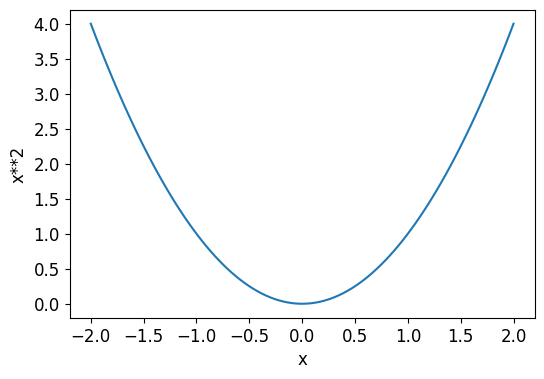

In [41]:
plot_function(f, 'x', 'x**2')

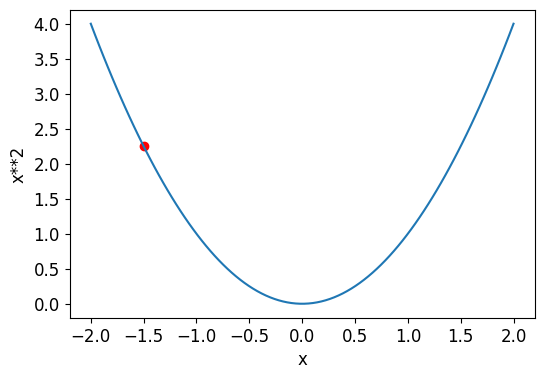

In [42]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

These are all just setting up the necessary start points to get the sample case started. We just picked a random value in the quadratic to get started with calculating the loss. It is important to note that we are not going to go through forward and backward passes in this section. For now, consider that the requires_grad function is just simply magic.

In [43]:
xt = tensor(3.0).requires_grad_()

In [44]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

we input xt into our loss function which is the x**2 and assign the result to the variable yt. So we get a resutk of 9. and have a gradient function built onto the tensor.

In [45]:
yt.backward()

we call .backward() to yt in order to calculate the gradients for each layer. Don't worry too much in understanding what forward pass and backward pass is since these will be covered in a later date. Just know that .backward() basically calculates the gradients. 

In [46]:
xt.grad

tensor(6.)

Since we've succesfully calculated the gradients already, we can check the results of xt.grad. The reason that xt.grad is changed is because recall that xt is now connected to yt. 

How did it go inside yt? Well, when we added .requires_grad_() to xt, this made it so that PyTorch will track changes done to it. In this case, it tracked the computed gradients from yt's backward(). 

In [47]:
xt

tensor(3., requires_grad=True)

xt and xt.grad provide different results because xt.grad stores the calculated gradients fom yt.backward() while xt stores the original values that were provided.

In [48]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

Now, this time we're gonna do the same exact thing but with vectors as the inputs. Recall that vectors are one-dimensonal arrays such as a row or a column [3,4,10], scalars which we used previously are individual numbers, and a matrix is two-dimensional ([1,3,4][5,6,7]).

In [49]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

Just the same as the previous function but we summed up all the results from the different elements inside the vector. 

So 3=9, 4=16, 10=100. Add all these up then you get 125. Pretty simple.

In [50]:
yt.backward()

In [51]:
xt.grad

tensor([ 6.,  8., 20.])

We do the same thing as before, recall that yt and xt are connected to each other now due to xt having .requires_grad_(). It isn't specifically have to be yt, any variable that you use will still be connected to xt once you call .backward(). 

This is because with .backward(), PyTorch will actually go back and check all the tensors associated with that variable (in this case yt) and check if they have the .requires_grad_() function.

**Note that you can't execute backward() twice.**

**--> Refer to fastbook STEPPING WITH A LEARNING RATE section. Images in the book will help in visualizing this!!**

Adjusting parameters with this formula | **weight -= gradient(weight) * learning_rate**

A critical part of deep learning is actually learning, and in this case we measure our learning by how close the model can get to the steepest point. The learning rate is a number that we use to move the gradient (or slope) in the parameter space (x-direction on a graph). 

So a small number used as a learning rate will make require a lot of steps but this is better than having a higher rate because that would mean a it could even overshoot or go out of bounds. 

While a small learning rate, while might take a while, can avoid overshooting and going out of bounds.

In [52]:
time = torch.arange(0,20).float();
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [53]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

NOTE: The previous function f(x): x**2 is a bit special because it didn't have any parameters hence there was nothing to optimize. Thus x instead was used to calculate gradients. Take note that function was simply used to demonstrate how gradients work in PyTorch.

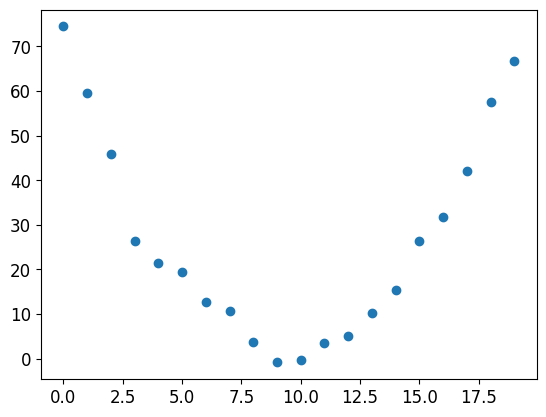

In [54]:
plt.scatter(time,speed);

In the code above, we'll be taking an example on how we can implement a learning rate to our gradient descent. To start off, imagine a scenario wherein you were climbing a hill on a car. The climb from the ground to the peak would be a lot harder and you would see your speed drop off. Then as you reach the highest and start descending, you start picking up speed again. 

Now, there is a lot of random noise added to the speed because we attempted to time the car manually so that's not really an accurate way to record speed. With this in mind, it's not fairly easy to answer the question of what was the speed of the car since the data is a bit skewed and unreliable. However, we can try to model this. The given formula for this would be the quadratic which is a*(x**2) + b*x + c

The reason as to why time is the input function is because that is the data that we have. The speed is the target variable because that is what our model needs to predict. Remember the main question: What is the car's speed?

REMEMBER THE CRUCIAL STEPS:

**Choose a model function** - in this case, quadratic. 
**Initialize Parameters / Weights** - start with random parameters and add the attribute for calculating gradients -> requires_grad_().
**Calculate Predictions** - using model function -> input value + params.
**Calculate Loss** - using mean squared error (mse_loss / l2_loss ) or mean absolute difference (l1_loss) -> predictions + target variable.
**Calculate Gradients** - utilizing the .backward() function. This would update our parameters that has the required gradient attribute. 
**Step The Weights** - using a specified learning rate and the gradients of the parameters. Utilize the function para -= param.grad * lr. Remember to reset the param.grad to none as we will start to repeat the process.
**REPEAT**

In [55]:
def mse(preds, targets): return ((preds-targets)**2).mean()

We need to decide on the method that we are going to use to calculate the loss. We are using mean squared error or L2 because it is strict when it comes large errors and punishes them accordingly. As you can see this is a lot similiar to the original introduction of mean squared errors. Wherein measuring the distance between the two for sample3 and mean3 was presented as distance3 = ((sample3-mean3)**2).mean().sqrt()

Take note that root mean squared error and mean squared error are two different things. RMSE is used to measure the actual distance with the values that we are given, meaning that we scale back the results to the original data. Meanwhile mean squared error provides the average of these squared differences. Plus, due to the squaring, this makes errors a lot more impactful.

In [56]:
def f(time, parameters):
    a,b,c = parameters
    return a*(time**2) + (b*time) + c 

Note that we haven't really yet created the parameters for this function. Remember that the parameters are usually generated randomly and this is what we will be doing in the next following cells. In the first function which was x**2. There was no method for parameters included.

In [57]:
params = torch.randn(3).requires_grad_()

In [58]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

We start to create our parameters out of random data and ensure that it has the requires_grad_() function because the parameter are the one's that we calculate the gradients with.

In [59]:
predictions = f(time, params)

In [60]:
predictions

tensor([ 1.3525e+00, -1.6391e-01, -3.2121e+00, -7.7919e+00, -1.3903e+01, -2.1547e+01, -3.0721e+01, -4.1428e+01, -5.3666e+01, -6.7436e+01, -8.2738e+01, -9.9571e+01, -1.1794e+02, -1.3783e+02,
        -1.5926e+02, -1.8222e+02, -2.0671e+02, -2.3274e+02, -2.6029e+02, -2.8938e+02], grad_fn=<AddBackward0>)

In [61]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

this function is primarily done to just showcase the predictions as a graph. No biggie.

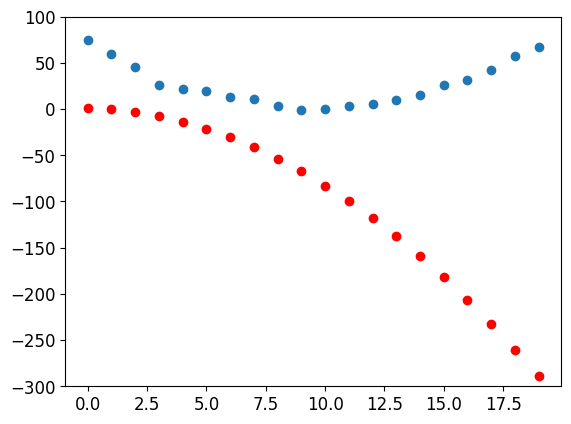

In [62]:
show_preds(predictions)

The prediction for the speed is a tad bit off (gross understatement). Understandable since the parameters were basically randomized but we'll need to fix that. 

In [63]:
loss = mse(predictions, speed)

In [64]:
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

So just to compare, this is akin to: distance3_sqr = ((sample3 - mean3)**2).mean().sqrt() just without the square root due to us using mean squared error only and not root mean squared error.

In [65]:
loss.backward()

Now that we've had our loss. It's time to calculate the gradients. Remember the steps! We call params.grad because params is the one that has the required_grad_() tag. 

In [66]:
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [67]:
params.grad.data

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [68]:
params.data

tensor([-0.7658, -0.7506,  1.3525])

Note that you don't need to specifically use params.grad.data -- This is actually considered an archaeic way of accessing grad data and instead you should only use params.grad

In [69]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

Remember that params.grad is the calculated gradients, params.data holds the actual current value of the weight, and params is the entire tensor which includes the gradient information. We want to specify the current weights only so that's why we use params.data. 

In [70]:
lr = 1e-5
params.data -= params.grad * lr
params.grad = None

Using the our specified learning rate and the associated formula. We have now succesfully adjusted the parameters. Or in other words, 'stepped' the weights. Since we're done with the gradients that we used before, we can now reset the gradients by specifying params.grad = None.

In [71]:
preds = f(time, params)

Since we have adjusted already adjusted the parameters (weights). It's time to redo the entire process. Starting by creating new predictions with the adjusted parameters.

In [72]:
mse(preds, speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

Let's take a look at the loss. If we compare this to the original loss. It's gotten a lot better.

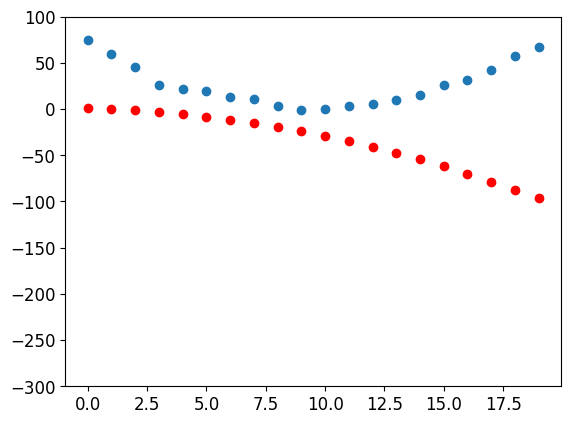

In [73]:
show_preds(preds)

If we check the predictions on the graph. It's true that it's gotten better. However, it's still not close to what we want. 

In [74]:
def apply_step(params, prn=True):
    predictions = f(time, params)
    loss = mse(predictions, speed)
    loss.backward()
    params.data -= params.grad * lr
    params.grad = None
    if prn: print(loss.item())
    return preds

This just basically compresses the entire process before into one function. The second argument - prn=True - is a handy addition that we made in order to print out the loss with loss.item(). Why not just ditch the prn=True? and just automatically print the loss? Well, that's just so we have more functionality in the code. It's good practice.

In [75]:
for i in range(10): apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


In [76]:
stacked_threes.shape, stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

Now we iterate by looping through the step again and again. We've seen the loss going down per each iteration. Since we've iterated through 10 epochs already. That's a good enough spot to stop.

In [77]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [78]:
train_x[1]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,


In [79]:
train_x.shape

torch.Size([12396, 784])

So it's time to get started with actually using our images. Firstly, we'll need to concatenate all these variables (stacked_threes and stacked_sevens) into one single tensor. Now stacked_threes and stacked_sevens are both rank-3 tensors (multidimensional matrix). We need to convert them to both into a rank-2 tensor (matrix). 

The reason that we have to change this into a rank-2 tensor is because most neural networks require inputs to be of rank-1 tensor (vector). Now you might wonder. How does the height and width data form in the vector? It's simply by sequence. So the first 28 elements would be the first row and so on and so forth until all the rows are done. Afterwards, then the columns would be next. 

.view() is a special function that would change the size or resize the shape of a tensor without changing it's contents. -1 is a special parameter to view that means "make this axis as big as necessary to fit all the data" Meanwhile it specifies that the 2nd parameter would be to merge the 2nd and 3rd dimensions.

For stacked_threes and stacked_sevens, which have shapes like {number of images, 28, 28}, the .view(-1, 28*28) operation will reshape the tensor into two dimensions:

The first dimension will be the total number of images from both stacked_threes and stacked_sevens.
The second dimension will be 28*28, which is the flattened image size.

**Remember that each row is a different flattened image**

If it's a bit hard to grasp, imagine if you had to add in another tensor of stacked_eights. It would still be appropriate to use .view(-1, 28*28) because the -1 would merge all these together into one.

Just a quick recap.

PS ----

Rank 3 Tensor - Multidimensional Matrix -> list of matrices
Rank 2 Tensor - Matrix -> list of vectors
Rank 1 Tensor - Vector -> list of scalars
Rank 0 Tensor - Scalar -> an individual number

Tensors are hierarchical in both ascending and descending order. 

In [80]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

In [81]:
train_y[2]

tensor([1])

The reason we need train_y is because we need to label our images. So train_y is simply labelling our images that we use from train_x. We need to make this into a tensor as well so we combine the threes and sevens into one rank-1 tensor or a list of vectors. We add in an unsqueeze(1) in order to make train_y into a rank-2 tensor. 

So unsqueeze() basically adds another dimension to a tensor. Notice how we don't use the stacked_threes and just instead use the threes. This is because we just want to label each image. We don't need to go deep as to the individual pixel values because that's all inside train_x. 

**Now while that's just good convention, we can still technically use stacked_threes as that still has the exact number of images that we want to label.**

It's fair to say that train_x is the data while train_y is the labels for the data.

In [82]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([1]))

so a "DataSet" requires a list that has elements of tuples of (x,y) --> search tuples if need more info **BUT basically tuples use ()**. So basically we make a tuple and put this into a list for the dataset. Basically dataset is now a list of tuples wherein the tuple compromises train_x and train_y.

In [83]:
dset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0

Since we've made this into a list. If you try to access a specific part such as [1] from the dataset. Wherein x is assigned to the first tuple's element which is train_x, and y is assigned to the label then you can see the corresponding data. So if we do x,y = dset[1]. We are specifying the second element where the x is the pixel values (rows + columns) and y is the image label whether or not it is a 3(1) or 7(0).

It can be a bit hard to look through the entire data above but just notice at the end there is a tensor([1]). That's the train_y since it's a tuple of two elements. If we look before at train_x near the end then you can notice that there is no something akin to that. 

In [84]:
valid_x = torch.cat([valid3_tens, valid7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid3_tens) + [0]*len(valid7_tens)).unsqueeze(1)
validDset = list(zip(valid_x, valid_y))

We do the same thing for our validation set but notice that we used the valid3_tens which is the same as our stacked_threes. This is because we didn't have anything similiar to threes for the validation set but we can make something akin to that. This is just to show that we can also use a tensor as long as it has the same amount of images we need for labels as well. Keep in mind that maintaining clear and consistent data structures is crucial for model training and evaluation.

In [85]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

Here we're just doing the exact same thing as we did before. Nothing big. Looks a bit intimidating but take time to get through this. You'll see that's there's really nothing new going on here.

In [86]:
weights = init_params((28*28, 1))

We're inserting a tuple into init_params that specifies the shape of the tensor that we want to create with randn. Now why is it specifically (28*28, 1)? Because that's the shape of the image that we have. Remember that train_x is a large matrix with each row being different images? We need this to speciifcally be (28*28, 1) because we need to do matrix multiplication with train_x. We can't do this if it's (1, 28*28). 

Remember that we are assigning random weights to each image's pixel values as their start parameters. Take note that we are **NOT** changing the pixel value's of the image. We are assigning weights! Keyword is assigning.

In [87]:
bias = init_params(1) 

We need to include a bias because there are some pixel values that are zero and if we multiply that by zero then the outcome is still the same. Bias is just one single number in a 1D Tensor. 

The model that we choose is a linear model. Specifically, a line which is basically --| y=w*x+b |-- The 'w' stands for weights. The 'b' stands for bias. 

In [88]:
(train_x[0] * weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

**NOTE!** For some reason there is a need to transpose here? Wherein fact it shouldn't be needed. However, without transposing the weights, the outputs are very high. Proof that there is no need for weights to be transposed is for the code below on linear1. 

In [89]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [90]:
train_x.shape

torch.Size([12396, 784])

**REMEMBER!** When doing matrix multiplication -> it is important to remember that we flattened the image. Train_x has 12396 rows of images and 784 columns of pixel data for each individual image. So each row is an image and each column is the pixel data of that image in that row.

The reason we specified weights to have 728 rows and only one column is because ---

see: http://matrixmultiplication.xyz/ for better explanation & visualization.

Notice how the weights 'changes orientation' when conductiong matrix multiplication? That's what we need.

In [99]:
corrects = (preds > 0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

Here we check how many of our predictions are on the mark by comparing them to the labels in train_y. 

**We are now checking for accuracy**. 

We are basically first translating the preds from numbers into a boolean depending on the results if it is greater than 0.0. Afterwards, we convert these booleans into floats which makes these into 1 or 0. Lastly, we compare this to the actual labels train_y and compare them. 

The final results would be whether or not the prediction is correct. So for example the last three values on preds are 18, 23, and 28. These were converted into 1's because they are greater than 0.0. Lastly, they were compared to train_y if they are equal. Turns out, they're not so that's why they came out as false. Because they did not match.

In [106]:
corrects.float().mean().item()

0.4912068545818329

Here we are again, converting all the booleans from the corrects into floats. Which means all these will now be either 1 or 0. We calculate the mean in order to get the accuracy. 

.Item() is a function that translates a scalar or a rank-0 tensor into a python float or int. Not necessarily needed but it's just a better way to visualize things as it is no longer a tensor.

In [108]:
with torch.no_grad(): weights[0] *= 1.0001

Now that we've got our accuracy, let's take a look what would happen if we changed one of the many weights. What would happen to the accuracy result then?

In [109]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.4912068545818329

Nothing changed! This is because a single change in the weights isn't enough to do anything at all.

We need a gradient to change the weights in order to actually learn. However, we can't use accuracy because accuracy has problems in of its own. Firstly, it doesn't account for small changes in the weights. Or to put it more simply, it only detects a change if a 3 becomes a 7 and vice versa. Additionally, accuracy doesn't have any 'confidence' measures. 

You would notice that supposedly, there are confidence metrics involved. A model can have a correct prediction while having low confidence and it could also have a high confidence on a wrong prediction. That's not the case for accuracy as it is only one or the other.

The loss function should not receive the images themselves but the predictions of the model instead. 

In [117]:
targets = tensor([1,0,1])
predictions = tensor([0.9,0.4,0.2])

Now suppose in our targets, we had three elements. 1 resembling a 3 while 7 resembling a 0. We have corresponding predictions from our model in the predictions variable. For the first element, our model predicted that it is a a 3 with high confidence. The second, it predicted that it is a 7 with fair confidence. The last element? It didn't predict it correctly due to it's very low confidence at 0.2. 

Now let's use a loss function that calculates the distance.

In [111]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

The where function of PyTorch shares similarities with list comprehension. So essentialy it works like (condition, input, other). It iterates through targets as an input and if the element is == 1. If it is equal to 1 then it it would subtract 1 with predictions, else it would retain predictions. Lastly it would calculate the mean of the entire results

In [120]:
torch.where(targets==1, 1-predictions, predictions)

tensor([0.1000, 0.4000, 0.8000])

Let's apply it manually to targets. Notice the distance? The first element is very close since it correctly predicted the number with high confidence. But it didn't predict it as 1 so the 0.1 error is very small. It retained the second because the distance of 0.0 to 0.4 is still 0.4. Indicating a 0.4 distance thus a moderatly-sized error. Meanwhile the last element, it showed that the distance is very far at 0.8. This indicates a large error.

Notice how this function provides lower values when:

1. the predictions are accurate 
2. the accurate predicton's confidence are high
3. the inaccurate prediction's confidence is low

Basically, a lower value for the loss function == BETTER! 

We need a scalar for our loss function so we need to calculate the mean. Luckily, our mnist_loss function already does that so let's just use that. 

In [124]:
mnist_loss(tensor([0.9, 0.4, 0.8]), targets)

tensor(0.2333)

Let's try making our very bad prediction at the third element into a better one. Let's switch that up to 0.8 instead of 0.2 and we'll notice that the loss function goes down. That's GOOD!

However, there is one slight issue with our current loss function and it's that it always assumes that our predictions are in-between 1 and 0. That's not actually the case. As we noticed earlier, our predictions are around 18, 28, 20, 15, etc. Not exactly 1 and 0. We need to do something about our predictions so that our loss function can work with them. That's where Sigmoid comes to play.